In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\tsd95\CSV Files\Model\IRIS.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
ob = LabelEncoder()

In [6]:
ob.fit(df['species'])

LabelEncoder()

In [7]:
ob.transform(df['species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
df = pd.concat([df,pd.DataFrame(ob.transform(df['species']),columns=['En_Spacies'])],axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,En_Spacies
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


<Axes: >

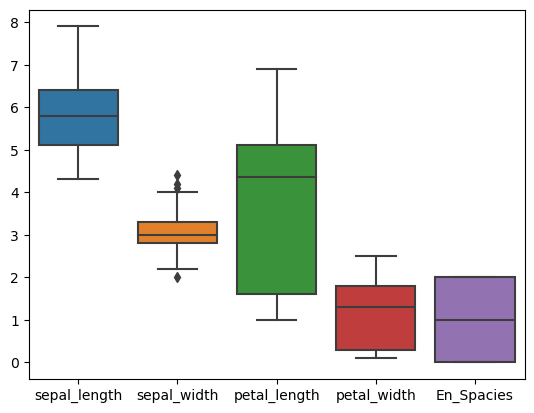

In [9]:
sns.boxplot(data=df)

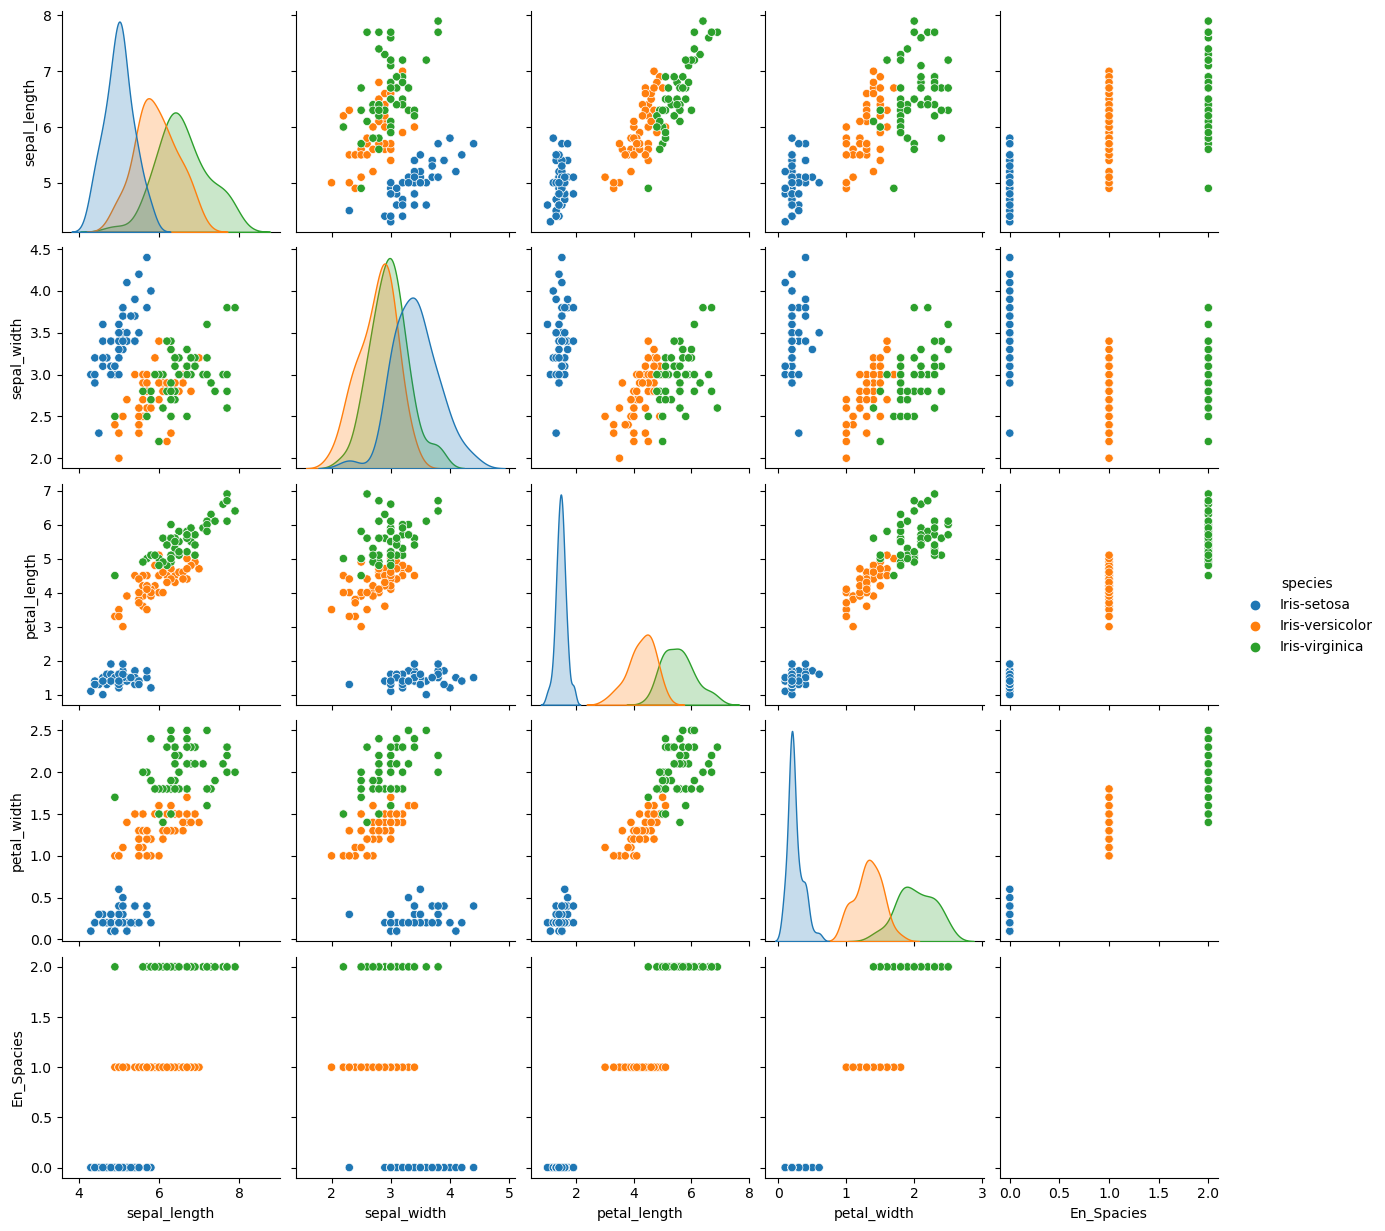

In [10]:
sns.pairplot(data=df,hue='species')

In [11]:
df.drop('species',axis=1,inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,En_Spacies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
X = df.drop('En_Spacies',axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y = df['En_Spacies']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: En_Spacies, Length: 150, dtype: int32

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [15]:
print('Size_of X_train',X_train.shape)
print('Size_of X_test',X_test.shape)
print('Size_of y_train',y_train.shape)
print('Size_of y_test',y_test.shape)

Size_of X_train (105, 4)
Size_of X_test (45, 4)
Size_of y_train (105,)
Size_of y_test (45,)


In [16]:
dt = DecisionTreeClassifier(criterion='entropy')

In [17]:
model = dt.fit(X_train,y_train)

In [18]:
yPred = model.predict(X_test)
yPred

array([0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2,
       0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0,
       0])

[Text(0.4, 0.9166666666666666, '0 <= 2.6\nentropy = 1.5834\nsamples = 105\nvalue = [35, 33, 37]\nclass = Iris-virginica'),
 Text(0.3, 0.75, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.75, '0 <= 1.65\nentropy = 0.9976\nsamples = 70\nvalue = [0, 33, 37]\nclass = Iris-virginica'),
 Text(0.2, 0.5833333333333334, '0 <= 4.95\nentropy = 0.3228\nsamples = 34\nvalue = [0, 32, 2]\nclass = Iris-versicolor '),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = Iris-versicolor '),
 Text(0.3, 0.4166666666666667, '0 <= 2.45\nentropy = 0.9183\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(0.2, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.4, 0.25, '0 <= 6.6\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor '),
 Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor '),
 Text(0.5, 0.0833333333333

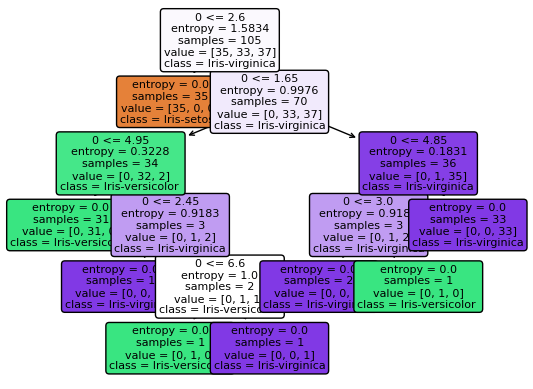

In [19]:
plot_tree(
          decision_tree=dt,feature_names=df.En_Spacies,
          class_names=['Iris-setosa','Iris-versicolor ','Iris-virginica'],
          filled=True,
          precision=4,
          rounded=True,
          fontsize=8
         )

In [20]:
cm = confusion_matrix(y_test,yPred)
cm

array([[15,  0,  0],
       [ 0, 16,  1],
       [ 0,  2, 11]], dtype=int64)

In [21]:
print(classification_report(y_test,yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      0.94      0.91        17
           2       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [22]:
le = LogisticRegression()

In [23]:
model_le = le.fit(X_train,y_train)

In [24]:
yPred_le = model_le.predict(X_test)

In [25]:
yPred

array([0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2,
       0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0,
       0])

In [26]:
cm_le = confusion_matrix(y_test,yPred_le)
cm_le

array([[15,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 13]], dtype=int64)

In [27]:
print(classification_report(y_test,yPred_le))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

